# Scale-free networks

- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
  - Anomalous regime $\gamma \leq 2$ means that the hub grows faster than the network itself, hence such a network cannot exist for simple graphs
  - Scale-free regime $2 < \gamma < 3$ mean the largest hub grows as fast as the network.
  - Random regime $\gamma > 3$ both the first and second moments are finite. The degree distribution $p_k$ decays fast, meaning there are less hubs and they are smaller.

- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
  - **No preferential attachment** ($\alpha = 0$) Here the network follows a simple exponetial degree distribution. There is no hubs and the network therefore looks  like a random network.
  - **Sublinear regime** ($0 < \alpha < 1$) Follows a stretched exponential distribution, which means few and small hubs compared to the scale-free network. As $\alpha \rightarrow 1$ the cutoff length over an increasing range of degrees.
  -- **Superlinear Regime** ($\alpha > 1$) Hubs are very attractive. The very all nodes will be *super* hubs, and most subsequent nodes will link to these.


## Barabasi-Albert model

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy as np
import random
from __future__ import division

In [36]:
G = nx.Graph()
G.add_nodes_from([1, 2])
G.add_edge(1, 2)

In [37]:
def add_node(G):
    ps = [item for sublist in G.edges() for item in sublist]
    G.add_edge(random.choice(ps), len(G.nodes()) + 1)
    
add_node(G)

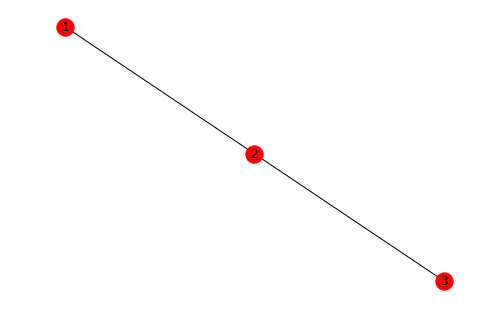

In [38]:
nx.draw(G, with_labels=True)
plt.show()

In [39]:
for _ in range(100):
    add_node(G)

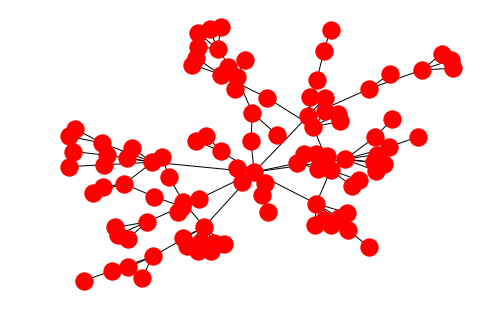

In [41]:
nx.draw(G)
plt.show()

In [42]:
for _ in range(5000 - len(G.nodes())):
    add_node(G)

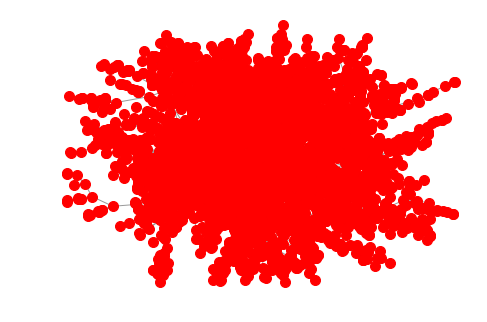

In [43]:
nx.draw(G, node_size=100, edge_color='#9A9A9A')
plt.show()

In [47]:
degrees = [d[1] for d in G.degree()]
d_min = min(degrees)
d_max = max(degrees)

print('d_min:', d_min, 'd_max:', d_max)

d_min: 1 d_max: 77


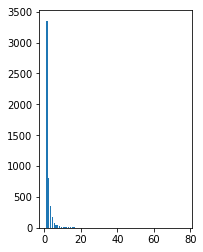

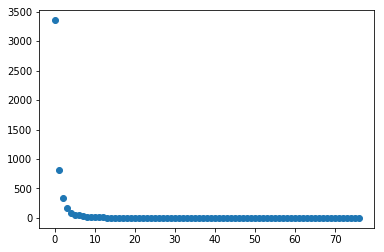

In [58]:
hist, bins = np.histogram(degrees, bins=d_max)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.subplot(122)
plt.bar(center, hist, align='center', width=width)
plt.show()
plt.plot(hist, 'o')
plt.show()

### Plotting on a log-log scale

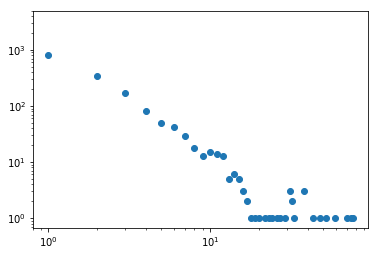

In [69]:
fig = plt.figure()
log = fig.add_subplot(1, 1, 1)
log.plot(hist, 'o')
log.set_yscale('log')
log.set_xscale('log')
plt.show()

## The friendship paradox

In [81]:
random_node = random.choice(list(G.nodes()))
d = G.degree(random_node)
print('Node:', random_node, 'degree:', d)

Node: 1736 degree: 1


In [85]:
d_mean = sum([G.degree(node) for node in G.neighbors(random_node)]) / len(list(G.neighbors(random_node)))
print('d_mean:', d_mean)

d_mean: 7.0


In [94]:
def friendship_paradox(G):
    random_node = random.choice(list(G.nodes()))
    degree = G.degree(random_node)
    d_mean = sum([G.degree(node) for node in G.neighbors(random_node)]) / len(list(G.neighbors(random_node)))

    return degree < d_mean

In [96]:
print(sum([friendship_paradox(G) for _ in range(1000)])) 

869


Above it can be seen that the friendship paradox is true for 869 out of 1000 random nodes (86.9%).

A Erdos-Renyi network with the same size would have a much more equal distribition of the edges in the network.
With the friendship paradox, I would expect the number would be much closer to 50%, due to the randomness of the connections and that everyone has almost the same degree.